## BAF507 금융데이터베이스-Exercise3

# 정회종(20214125)

# 1. 환율 데이터 다운로드

In [1]:
import pandas as pd

In [2]:
df_xr = pd.read_excel('data/krw_usd_xr.xlsx')

In [3]:
df_xr.head(3)

,날짜,주요국통화의 대원화 환율 - 원/미국달러(매매기준율)
0,1964-05-04,255.77
1,1964-05-05,255.77
2,1964-05-06,255.77


In [4]:
df_xr['날짜'] = pd.to_datetime(df_xr['날짜'])

In [5]:
df_xr = df_xr.set_index('날짜')

In [8]:
df_xr.columns = ['KRW/USD']

In [9]:
df_xr.head(3)

,KRW/USD
날짜,
1964-05-04,255.77
1964-05-05,255.77
1964-05-06,255.77


In [10]:
import matplotlib.pyplot as plt

In [11]:
plt.rcParams['figure.figsize']=[10,4]

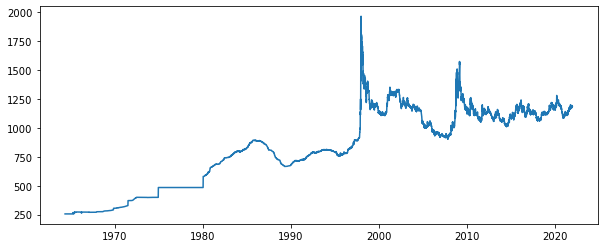

In [12]:
plt.plot(df_xr['KRW/USD'])
plt.show()

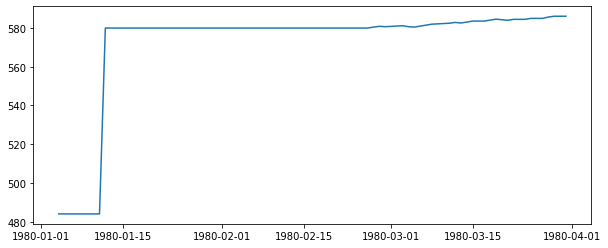

In [13]:
plt.plot(df_xr.loc['1980-01-01':'1980-03-31'])
plt.show()

In [14]:
df_xr = df_xr.loc['1980-03-01':]

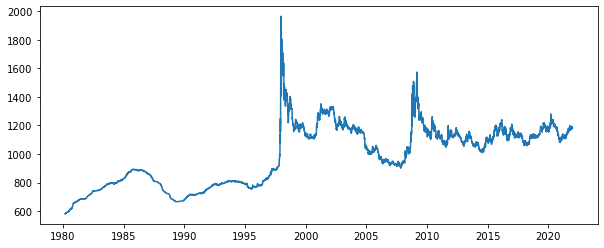

In [15]:
plt.plot(df_xr)
plt.show()

## 2. Convert to monthly observations

# (1) Monthly average - old and hard way

In [19]:
df_xr['ym'] = df_xr.index.year * 100 + df_xr.index.month

In [21]:
df_xr.groupby('ym')['KRW/USD'].mean()

ym
198003     583.504167
198004     589.808000
198005     593.600000
198006     598.945833
198007     605.400000
             ...     
202108    1160.338095
202109    1169.542105
202110    1182.821053
202111    1182.909091
202112    1183.315000
Name: KRW/USD, Length: 502, dtype: float64

In [22]:
del df_xr['ym']

# (2) Monthly average - easy way

In [23]:
df_xr.resample('M').mean()

,KRW/USD
날짜,
1980-03-31,583.504167
1980-04-30,589.808000
1980-05-31,593.600000
1980-06-30,598.945833
1980-07-31,605.400000
...,...
2021-08-31,1160.338095
2021-09-30,1169.542105
2021-10-31,1182.821053


# (3) End-of-month observations

In [25]:
df_monthly = df_xr.resample('M').last()

In [26]:
df_monthly.head()

,KRW/USD
날짜,
1980-03-31,586.1
1980-04-30,590.5
1980-05-31,596.2
1980-06-30,603.0
1980-07-31,612.7


In [27]:
from pandas.tseries.offsets import MonthBegin, MonthEnd

# 3. 잘못된 환율 예측 : 가격을 그대로 사용하기

In [28]:
import statsmodels.api as sm

In [31]:
X = df_monthly.iloc[:-1]
X = sm.add_constant(X)

In [32]:
Y = df_monthly.iloc[1:]

In [33]:
model = sm.OLS(Y,X.values)

In [34]:
results = model.fit()

In [35]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                KRW/USD   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                 1.682e+04
Date:                Tue, 28 Dec 2021   Prob (F-statistic):               0.00
Time:                        21:39:26   Log-Likelihood:                -2493.7
No. Observations:                 501   AIC:                             4991.
Df Residuals:                     499   BIC:                             5000.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.2303      7.635      2.388      0.017       3.229      33.232
x1             0.9827      0.008    129.690      0.000       0.968       0.998
==============================================================================
Omnibus:                      172.410   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7389.649
Skew:                           0.718   Prob(JB):                         0.00
Kurtosis:                      21.760   Cond. No.                     4.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 4. 올바른 환율 예측:변화율사용하기

# 변화율 계산방법 1:Shift

In [38]:
df_monthly['lagged'] = df_monthly.shift(1)

In [40]:
df_monthly['ret1'] = (df_monthly['KRW/USD'] / df_monthly['lagged']-1)*100

In [41]:
df_monthly.head()

,KRW/USD,lagged,ret1
날짜,,,
1980-03-31,586.1,NaN,NaN
1980-04-30,590.5,586.1,0.750725
1980-05-31,596.2,590.5,0.965284
1980-06-30,603.0,596.2,1.140557
1980-07-31,612.7,603.0,1.608624


# 변화율 계산방법 2:pct_change

In [42]:
df_monthly['ret2'] = df_monthly['KRW/USD'].pct_change()*100

In [43]:
df_monthly.head()

,KRW/USD,lagged,ret1,ret2
날짜,,,,
1980-03-31,586.1,NaN,NaN,NaN
1980-04-30,590.5,586.1,0.750725,0.750725
1980-05-31,596.2,590.5,0.965284,0.965284
1980-06-30,603.0,596.2,1.140557,1.140557
1980-07-31,612.7,603.0,1.608624,1.608624


# 변화율 summary stat보기

In [44]:
df_monthly['ret1'].describe()

count    501.000000
mean       0.181510
std        2.888001
min      -15.931955
25%       -0.830876
50%        0.069874
75%        0.898204
max       21.601650
Name: ret1, dtype: float64

In [45]:
summary = df_monthly['ret1'].describe()
norm_min = (summary['min'] - summary['mean']) / summary['std']
norm_max = (summary['max'] - summary['mean']) / summary['std']

print('Normalized range: {:.2f} ~ {:.2f} sigma'.format(norm_min, norm_max))

Normalized range: -5.58 ~ 7.42 sigma


해석
1. 한달 평균 0.174%증가
2. 한번에 15.9%떨어진적도 있고, 21.6%증가한적도 있음. 표준편차와 비교할때 -5.54씨그마 ~ 7.37씨그마에 해당하는 범위
3. 따라서 환율 변화는 정규분포를 따르지 않음. tail risk존재

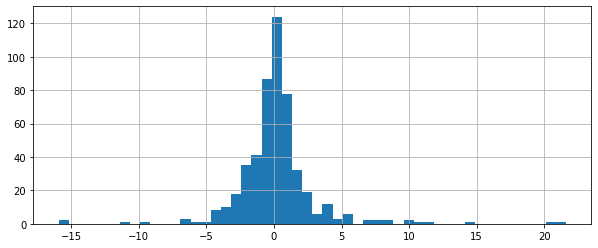

In [46]:
df_monthly['ret1'].hist(bins=50)
plt.show()

# 환율 변화율을 예측하기

In [47]:
df_monthly = df_monthly.dropna()

In [49]:
X = df_monthly.iloc[:-1]['ret1']
X = sm.add_constant(X)

In [50]:
Y = df_monthly.iloc[1:]['ret1']

In [51]:
model = sm.OLS(Y,X.values)

In [52]:
resutls = model.fit()

In [54]:
resutls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   ret1   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     14.81
Date:                Tue, 28 Dec 2021   Prob (F-statistic):           0.000134
Time:                        21:52:21   Log-Likelihood:                -1232.4
No. Observations:                 500   AIC:                             2469.
Df Residuals:                     498   BIC:                             2477.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1493      0.128      1.168      0.243      -0.102       0.400
x1             0.1700      0.044      3.849      0.000       0.083       0.257
==============================================================================
Omnibus:                      152.753   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4432.772
Skew:                           0.664   Prob(JB):                         0.00
Kurtosis:                      17.526   Cond. No.                         2.90
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# IMF 이후만 가지고 예측을 해본다면?

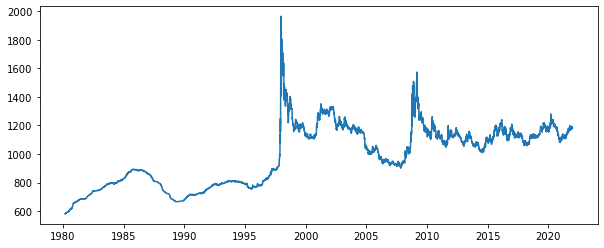

In [55]:
plt.plot(df_xr)
plt.show()

In [57]:
df_post_imf = df_monthly['1999-01-01':]

In [67]:
X = df_post_imf.iloc[:-1]['ret1']
X = sm.add_constant(X)

/Users/junghoij/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [68]:
Y = df_post_imf.iloc[1:]['ret1']

In [69]:
model = sm.OLS(Y,X.values)

In [70]:
resutls = model.fit()

In [71]:
resutls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   ret1   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.228
Date:                Tue, 28 Dec 2021   Prob (F-statistic):              0.269
Time:                        22:03:31   Log-Likelihood:                -687.98
No. Observations:                 275   AIC:                             1380.
Df Residuals:                     273   BIC:                             1387.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0495      0.179      0.277      0.782      -0.302       0.401
x1            -0.0668      0.060     -1.108      0.269      -0.186       0.052
==============================================================================
Omnibus:                       62.571   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              373.625
Skew:                           0.741   Prob(JB):                     7.38e-82
Kurtosis:                       8.515   Cond. No.                         2.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""